In [59]:
#import
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, normalized_mutual_info_score, rand_score
from sklearn import metrics

In [60]:
#Caculate the random state
students_id = ['2110179', '2111667', '2112160','2116337','2111926']
n_samples = 300
random_state=0
for i in students_id:
    for char in i:
        if char.isdigit():
            random_state += int(char)

In [61]:
#Dataset 1
X,y = make_blobs(n_samples=n_samples,random_state=random_state)#gussiun deistrbution 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
#Dataset 2
X1, y1 = make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X1 = np.dot(X1, transformation)#would be linear transformation
X_scaled1 = scaler.fit_transform(X1)

In [63]:
#Dataset 3
X2,y2 = make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)
X_scaled2 = scaler.fit_transform(X2)

In [64]:
#Dataset 4
X3,y3 = make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)
X_scaled3 = scaler.fit_transform(X3)

# K_mean 

In [65]:
def k_means(data, k, max_iterations=100):
    
    # Step 1: Initialize cluster centroids
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        # Step 2: Assign data points to clusters
        clusters = assign_data_points(data, centroids)
        # Step 3: Update cluster centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids


def initialize_centroids(data, k):
    np.random.seed(20)  # Set a seed for reproducibility
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    # data.shape[0] returns the number of rows in the array.(300)
    #from 300 give me 3 number randomly
    centroids = data[indices].copy()  # Make a copy of the selected centroids
    return centroids  

def assign_data_points(data, centroids):
    # Calculate the Euclidean distances between each data point and each centroid
    distances = np.sqrt(np.sum((data[:, np.newaxis] - centroids) ** 2, axis=2))
    #data[:, np.newaxis] converts a 1-dimensional array into a 2-dimensional column vector. 
    # Find the index of the centroid with the minimum distance for each data point
    clusters = np.argmin(distances, axis=1)
    return clusters


def update_centroids(data, clusters, k):
    new_centroids = np.empty((0, data.shape[1]))  # Initialize an empty array for new centroids []
    for i in range(k): #k = 3
        cluster_points = data[clusters == i] #belong to which cluster 
        if cluster_points.shape[0] > 0:
            centroid = np.mean(cluster_points, axis=0) #this where we get the new centroid
            new_centroids = np.vstack((new_centroids, centroid)) #make them into one and put it in new 
        else:
            random_index = np.random.choice(data.shape[0])
            centroid = data[random_index]
            new_centroids = np.vstack((new_centroids, centroid))

    return new_centroids

### Dataset 1

In [66]:
sl_dict = {}
for k in range(2,8):
    cluster_assignments , centroids = k_means(X_scaled,k)
    sl_dict[k] = metrics.silhouette_score(X_scaled, cluster_assignments, metric='euclidean')
    print(k, sl_dict[k])

2 0.724628736411776
3 0.7496914880041579
4 0.6073580302036593
5 0.49337720951615655
6 0.46649716495227417
7 0.3862230688660553


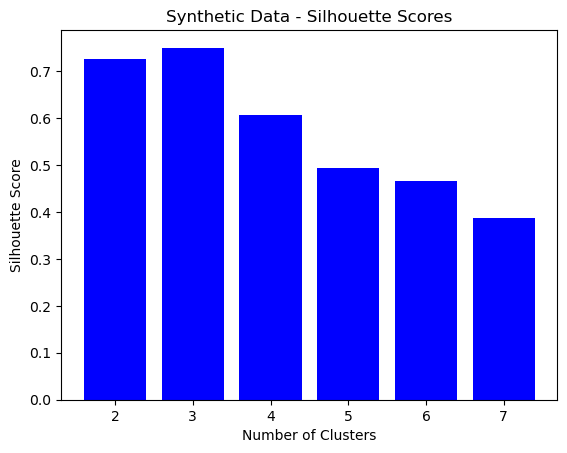

In [67]:
k = list(sl_dict.keys())
values = list(sl_dict.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'b')
plt.title('Synthetic Data - Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
cluster = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
f1 = f1_score(y, cluster, average='weighted')
print(f1)

1.0


In [69]:
cluster_assignments , centroids = k_means(X_scaled, 3)
print("Final centroids:")
print(centroids)

print("Cluster assignments:")
print(cluster_assignments)

Final centroids:
[[ 0.16189311 -1.15197303]
 [-1.24882002  1.251475  ]
 [ 1.08692691 -0.09950197]]
Cluster assignments:
[2 1 1 2 1 1 1 1 0 2 2 0 2 0 0 1 0 0 2 1 0 1 2 0 0 0 0 2 2 2 1 2 2 2 0 2 2
 2 1 2 2 0 2 1 2 0 1 0 2 2 1 2 2 2 0 1 2 0 2 1 2 0 1 0 1 0 2 2 1 2 1 1 2 2
 0 0 1 0 1 2 1 2 0 2 2 0 0 1 0 0 1 0 2 2 0 2 1 0 1 1 1 2 1 2 0 2 2 0 0 1 1
 2 1 1 0 1 0 1 1 2 1 2 2 1 1 1 0 2 2 1 2 1 0 0 1 2 0 0 2 1 1 0 0 2 1 1 0 0
 1 1 2 0 2 0 1 2 0 0 2 2 1 0 2 0 2 2 1 1 1 2 0 0 0 1 1 1 1 2 0 0 0 0 0 2 0
 0 0 0 0 0 2 2 1 1 2 1 2 0 0 0 0 2 1 2 0 0 0 0 1 2 1 0 1 2 2 2 0 2 0 1 0 0
 1 0 1 2 2 1 0 1 2 2 1 1 1 0 2 1 0 2 0 0 1 1 0 1 2 1 0 2 0 1 1 2 0 2 0 0 2
 1 2 1 1 2 2 1 2 1 2 0 1 1 2 0 2 0 0 1 2 1 1 0 2 1 2 1 0 1 0 1 2 1 0 0 1 1
 2 1 2 0]


In [70]:
f1_k1 = f1_score(y, cluster_assignments, average='weighted')
print("f1_score:",f1_k1)

f1_score: 1.0


In [71]:
nmi_k1 = normalized_mutual_info_score(y, cluster_assignments)
print("Normalized Mutual Information:", nmi_k1)

Normalized Mutual Information: 1.0


In [72]:
rand_statistic_k1 = rand_score(y, cluster_assignments)
print("Rand Statistic:", rand_statistic_k1)

Rand Statistic: 1.0


### Dataset 2

In [73]:
sl_dict1 = {}
for k in range(2,8):
    cluster_assignments1 , centroids1 = k_means(X_scaled1,k)
    sl_dict1[k] = metrics.silhouette_score(X_scaled1, cluster_assignments1, metric='euclidean')
    print(k, sl_dict1[k])

2 0.8747711727153171
3 0.6113583947584506
4 0.4750260835531776
5 0.43697201775404876
6 0.4381876671060393
7 0.42217137820471273


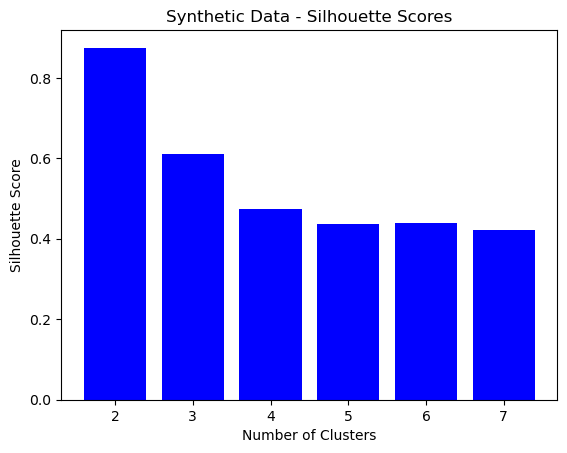

In [74]:
k = list(sl_dict1.keys())
values = list(sl_dict1.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'b')
plt.title('Synthetic Data - Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [75]:
cluster_assignments1 , centroids1 = k_means(X_scaled1, 2)
print("Final centroids:")
print(centroids1)

print("Cluster assignments:")
print(cluster_assignments1)

Final centroids:
[[ 0.69458052 -0.68623241]
 [-1.38916105  1.37246482]]
Cluster assignments:
[0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1
 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1
 0 1 0 0]


In [76]:
f1_k2 = f1_score(y1, cluster_assignments1, average='weighted')
print("f1_score:",f1_k2)

f1_score: 0.5555555555555555


In [77]:
nmi_k2 = normalized_mutual_info_score(y1, cluster_assignments1)
print("Normalized Mutual Information:", nmi_k2)

Normalized Mutual Information: 0.7336804366512119


In [78]:
rand_statistic_k2 = rand_score(y1, cluster_assignments1)
print("Rand Statistic:", rand_statistic_k2)

Rand Statistic: 0.7770345596432553


### Dataset 3

In [79]:
sl_dict2 = {}
for k in range(2,8):
    cluster_assignments2 , centroids2 = k_means(X_scaled2,k)
    sl_dict2[k] = metrics.silhouette_score(X_scaled2, cluster_assignments2, metric='euclidean')
    print(k, sl_dict2[k])


2 0.4945242090931751
3 0.4371089937938398
4 0.4084192573644175
5 0.43300080875410873
6 0.4502679042232847
7 0.4463829740383119


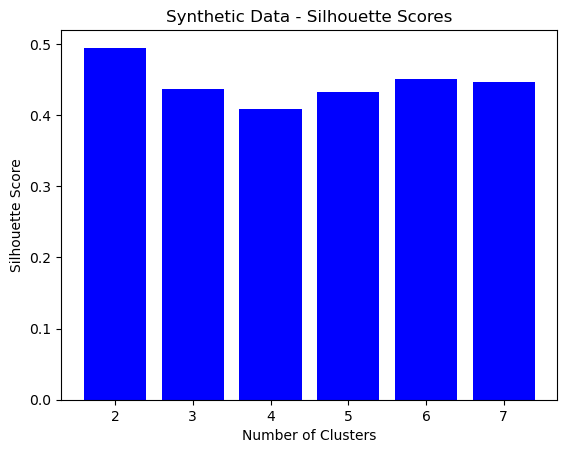

In [80]:
k = list(sl_dict2.keys())
values = list(sl_dict2.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'b')
plt.title('Synthetic Data - Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [81]:
cluster_assignments2 , centroids2 = k_means(X_scaled2, 2)
print("Final centroids:")
print(centroids2)

print("Cluster assignments:")
print(cluster_assignments2)

Final centroids:
[[-0.74527809  0.79355759]
 [ 0.73540686 -0.7830469 ]]
Cluster assignments:
[1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 1]


In [82]:
f1_k3 = f1_score(y2, cluster_assignments2, average='weighted')
print("f1_score:",f1_k3)

f1_score: 0.8433315925732509


In [83]:
nmi_k3 = normalized_mutual_info_score(y2, cluster_assignments2)
print("Normalized Mutual Information:", nmi_k3)

Normalized Mutual Information: 0.3737594093895332


In [84]:
rand_statistic_k3 = rand_score(y2, cluster_assignments2)
print("Rand Statistic:", rand_statistic_k3)

Rand Statistic: 0.7348717948717949


### Dataset 4

In [85]:
sl_dict3 = {}
for k in range(2,8):
    cluster_assignments3 , centroids3 = k_means(X_scaled3,k)
    sl_dict3[k] = metrics.silhouette_score(X_scaled3, cluster_assignments3, metric='euclidean')
    print(k, sl_dict3[k])

2 0.3478236494926462
3 0.3817006549128171
4 0.37546389370309985
5 0.3480994774611652
6 0.35060144635658824
7 0.35554250675641746


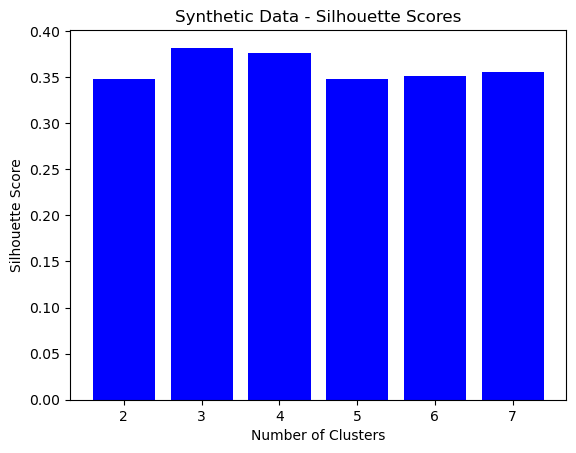

In [86]:
k = list(sl_dict3.keys())
values = list(sl_dict3.values())

plt.bar(range(len(k)),values,tick_label=k, color = 'b')
plt.title('Synthetic Data - Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [87]:
cluster_assignments3 , centroids3 = k_means(X_scaled3, 3)
print("Final centroids:")
print(centroids3)

print("Cluster assignments:")
print(cluster_assignments3)

Final centroids:
[[ 0.14413811  1.0778516 ]
 [ 0.83892172 -0.71255196]
 [-1.05701306 -0.40356226]]
Cluster assignments:
[1 0 2 1 1 0 0 0 2 0 1 1 1 2 0 1 2 0 1 1 1 2 1 0 0 0 0 0 2 1 1 1 1 0 1 0 2
 0 1 1 2 1 1 0 2 1 1 0 1 2 1 2 2 0 2 1 1 1 1 0 0 2 1 1 0 1 1 2 2 0 2 0 2 1
 1 0 0 0 2 0 0 2 1 0 1 0 1 1 1 0 2 0 2 1 1 0 1 1 1 2 0 1 2 1 2 1 1 0 2 0 0
 0 0 1 2 1 1 2 2 1 1 2 0 2 0 2 0 2 2 0 1 2 2 2 0 2 2 0 2 2 0 0 0 0 1 0 0 2
 0 2 1 1 1 2 1 0 1 2 1 0 1 1 0 0 1 2 1 2 2 2 1 0 1 0 0 0 2 0 0 2 2 1 0 0 0
 2 0 2 2 1 2 2 0 0 2 1 0 1 1 1 0 0 1 2 1 1 1 2 0 1 0 0 2 2 1 2 2 2 2 1 2 0
 1 1 1 2 2 2 1 0 0 1 0 0 2 2 0 2 2 1 0 0 2 0 0 2 0 2 2 1 1 1 1 0 2 2 0 0 0
 1 2 2 0 0 2 2 2 2 0 1 1 1 2 0 2 0 1 2 0 2 1 0 1 0 0 0 2 2 0 2 0 0 1 1 1 2
 0 1 2 1]


In [88]:
f1_k4 = f1_score(y3, cluster_assignments3, average='weighted')
print("f1_score:",f1_k4)

f1_score: 0.3960411569107221


In [89]:
nmi_k4 = normalized_mutual_info_score(y3, cluster_assignments3)
print("Normalized Mutual Information:", nmi_k4)

Normalized Mutual Information: 0.00025521394036178926


In [90]:
rand_statistic_k4 = rand_score(y3, cluster_assignments3)
print("Rand Statistic:", rand_statistic_k4)

Rand Statistic: 0.49848383500557414


# DBSCAN

In [91]:
def dbscan(X, eps, min_samples):
    n_samples, _ = X.shape #make the number of sample same as the data we sent
    labels = np.full(n_samples, -1)  # Initialize labels as noise (-1)
    #here we make the array shape all is -1 which means in our code that it is noise points

    cluster_id = 0 #initialize to the clusetrs
    for i in range(n_samples):
        if labels[i] != -1: #if the label number i is not = noise contunues
            continue  # Skip if the point is already assigned to a cluster
        
        
        #if it is noise
        #call the function to make neighbors for each point with eps point
        neighbors = get_neighbors(X, i, eps) #one point bu one
        
        
        #decide if it is core point
        if len(neighbors) < min_samples: #it is not core point becuse less
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1 #this is a core point
            #???assign cluster labels to the data points that are in the same cluster as the current data point.???
            expand_cluster(X, i, neighbors, labels, cluster_id, eps, min_samples)

    return labels

def get_neighbors(X, i, eps):
    distances = np.linalg.norm(X - X[i], axis=1) #calculate the distince matrix (Euclidean distance)
    return np.where(distances <= eps)[0] #disced if it is more than the eps it will be neighbors
    # The [0] indexing is used to extract the indices from the resulting tuple returned by np.where(). 
    #The indices represent the positions of the data points that meet the distance criterion.
    
    
def expand_cluster(X, i, neighbors, labels, cluster_id, eps, min_samples):
    labels[i] = cluster_id
    for neighbor in neighbors:
        if labels[neighbor] == -1: # if it was noise get insied the if
            labels[neighbor] = cluster_id #?If the neighbor is not assigned to any cluster, it is assigned to the current cluster being expanded?.
            sub_neighbors = get_neighbors(X, neighbor, eps)#find the neighbors of the current neighbor.

#checks if the number of neighbors found for 
#the current neighbor is greater than or equal to the minimum
#number of samples required to form a dense region.

            if len(sub_neighbors) >= min_samples:

#sub_neighbors array is merged with the neighbors array
#using the np.union1d function. This ensures that the expanded cluster
#includes all the neighbors found so far.

                neighbors = np.union1d(neighbors, sub_neighbors)


### Dataset 1

In [92]:
eps = 1
min_samples = 4
labels = dbscan(X_scaled, eps, min_samples)
print("labels:\n" , labels)

labels:
 [1 2 2 1 2 2 2 2 3 1 1 3 1 3 3 2 3 3 1 2 3 2 1 3 3 3 3 1 1 1 2 1 1 1 3 1 1
 1 2 1 1 3 1 2 1 3 2 3 1 1 2 1 1 1 3 2 1 3 1 2 1 3 2 3 2 3 1 1 2 1 2 2 1 1
 3 3 2 3 2 1 2 1 3 1 1 3 3 2 1 3 2 3 1 1 3 1 2 3 2 2 2 1 2 1 3 1 1 3 3 2 2
 1 2 2 3 2 3 2 2 1 2 1 1 2 2 2 3 1 1 2 1 2 3 3 2 1 3 3 1 2 2 3 3 1 2 2 4 3
 2 2 1 3 1 3 2 1 3 3 1 1 2 3 1 3 1 1 2 2 2 1 3 3 3 2 2 2 2 1 3 3 3 3 3 1 3
 3 3 3 3 3 1 1 2 2 1 2 1 3 3 3 1 1 2 1 3 3 3 3 2 1 2 3 5 1 1 1 3 1 3 2 3 3
 2 3 2 1 1 2 3 2 1 1 2 2 2 3 1 2 3 1 3 3 2 2 3 2 1 2 3 1 3 2 2 1 3 1 3 3 1
 2 1 2 2 1 1 2 1 2 1 3 2 2 1 3 1 3 3 2 1 2 2 3 1 2 1 2 3 2 3 2 1 2 3 3 2 2
 1 2 1 3]


In [93]:
f1_D1 = f1_score(y, labels, average='weighted')
print("f1_score:",f1_D1)

f1_score: 0.0


In [94]:
nmi_D1 = normalized_mutual_info_score(y, labels)
print("Normalized Mutual Information:", nmi_D1)

Normalized Mutual Information: 0.9540094171080351


In [95]:
rand_statistic_D1 = rand_score(y, labels)
print("Rand Statistic:", rand_statistic_D1)

Rand Statistic: 0.9868004459308807


### Dataset 2

In [96]:
eps = 1.3
labels1 = dbscan(X_scaled1, eps, min_samples)
print("labels:\n" , labels1)

labels:
 [1 2 2 1 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 2 1 2 2 1 1
 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 2 2
 1 2 2 1 2 1 2 2 1 2 1 1 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1
 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1
 2 1 2 1 1 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 2 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1
 2 1 2 2 1 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 2 1 1 2 2
 1 2 1 1]


In [97]:
f1_D2 = f1_score(y1, labels1, average='weighted')
print("f1_score:",f1_D2)

f1_score: 0.0


In [98]:
nmi_D2 = normalized_mutual_info_score(y1, labels1)
print("Normalized Mutual Information:", nmi_D2)

Normalized Mutual Information: 0.7336804366512119


In [99]:
rand_statistic_D2 = rand_score(y1, labels1)
print("Rand Statistic:", rand_statistic_D2)

Rand Statistic: 0.7770345596432553


### Dataset 3

In [100]:
eps=1.9
labels2 = dbscan(X_scaled2, eps, min_samples)
print("labels:\n" , labels2)

labels:
 [1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1
 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 2 1 1 2 2 1 2 1 1
 1 1 2 2 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1
 1 2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1
 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 3 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 2 1]


In [101]:
f1_D3 = f1_score(y2, labels2, average='weighted')
print("f1_score:",f1_D3)

f1_score: 0.40431266846361186


In [102]:
nmi_D3 = normalized_mutual_info_score(y2, labels2)
print("Normalized Mutual Information:", nmi_D3)

Normalized Mutual Information: 0.35828440296496733


In [103]:
rand_statistic_D3 = rand_score(y2, labels2)
print("Rand Statistic:", rand_statistic_D3)

Rand Statistic: 0.6357413600891861


### Dataset 4

In [104]:
eps=2.74
labels3 = dbscan(X_scaled3, eps, min_samples)
print("labels:\n" , labels3)

labels:
 [1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 3 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 1 1 1
 1 1 1 2 2 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2
 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 2 1]


In [105]:
f1_D4 = f1_score(y3, labels3, average='weighted')
print("f1_score:",f1_D4)

f1_score: 0.38701298701298703


In [106]:
nmi_D4 = normalized_mutual_info_score(y3, labels3)
print("Normalized Mutual Information:", nmi_D4)

Normalized Mutual Information: 0.25728118625580687


In [107]:
rand_statistic_D4 = rand_score(y3, labels3)
print("Rand Statistic:", rand_statistic_D4)

Rand Statistic: 0.582809364548495


# Summary

### visulization

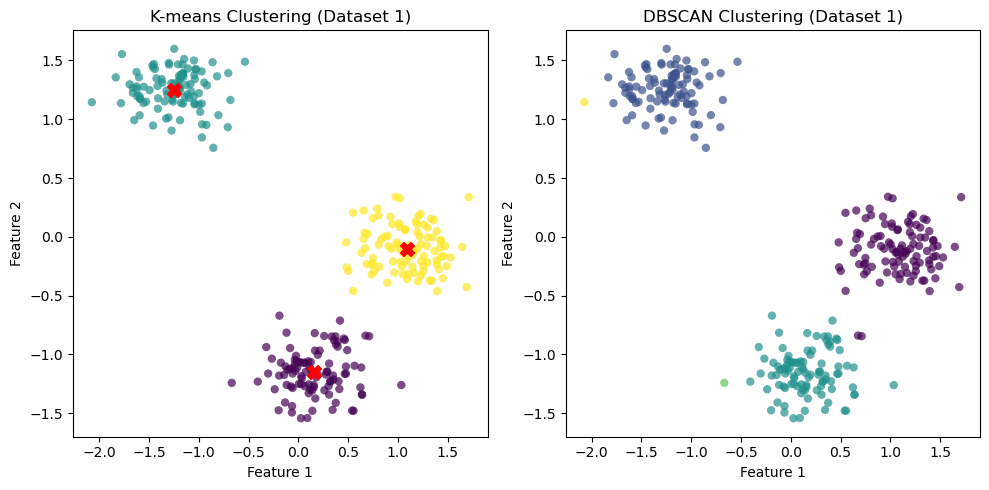

In [108]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data points and final centroids for K-means clustering
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, alpha=0.7, edgecolors='none')
axs[0].scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
axs[0].set_title('K-means Clustering (Dataset 1)')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot the data points for DBSCAN clustering
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, alpha=0.7, edgecolors='none')
axs[1].set_title('DBSCAN Clustering (Dataset 1)')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

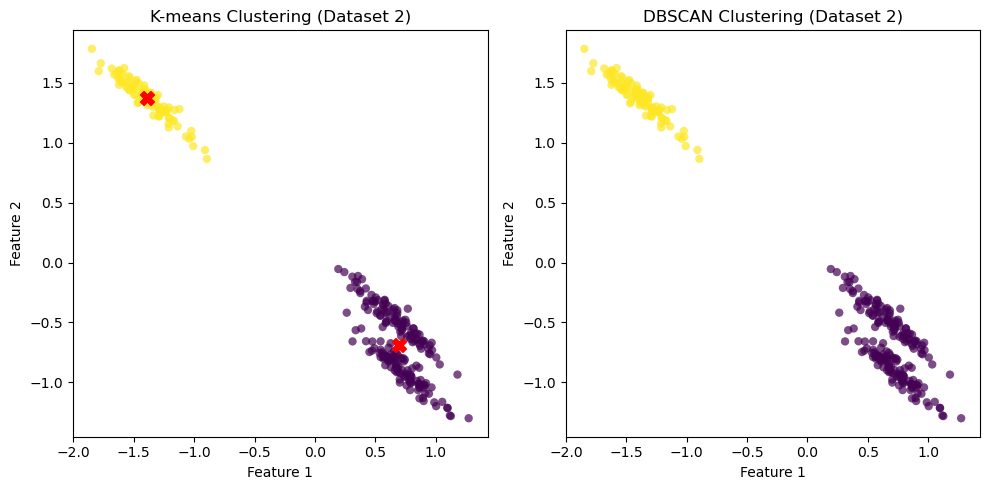

In [109]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data points and final centroids for K-means clustering
axs[0].scatter(X_scaled1[:, 0], X_scaled1[:, 1], c=cluster_assignments1, alpha=0.7, edgecolors='none')
axs[0].scatter(centroids1[:, 0], centroids1[:, 1], marker='X', color='red', s=100)
axs[0].set_title('K-means Clustering (Dataset 2)')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot the data points for DBSCAN clustering
axs[1].scatter(X_scaled1[:, 0], X_scaled1[:, 1], c=labels1, alpha=0.7, edgecolors='none')
axs[1].set_title('DBSCAN Clustering (Dataset 2)')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

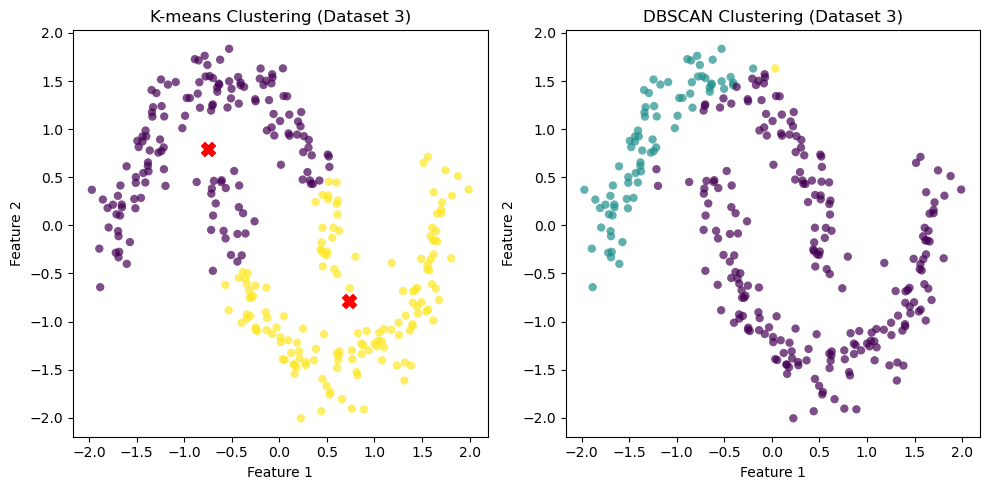

In [110]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data points and final centroids for K-means clustering
axs[0].scatter(X_scaled2[:, 0], X_scaled2[:, 1], c=cluster_assignments2, alpha=0.7, edgecolors='none')
axs[0].scatter(centroids2[:, 0], centroids2[:, 1], marker='X', color='red', s=100)
axs[0].set_title('K-means Clustering (Dataset 3)')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot the data points for DBSCAN clustering
axs[1].scatter(X_scaled2[:, 0], X_scaled2[:, 1], c=labels2, alpha=0.7, edgecolors='none')
axs[1].set_title('DBSCAN Clustering (Dataset 3)')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

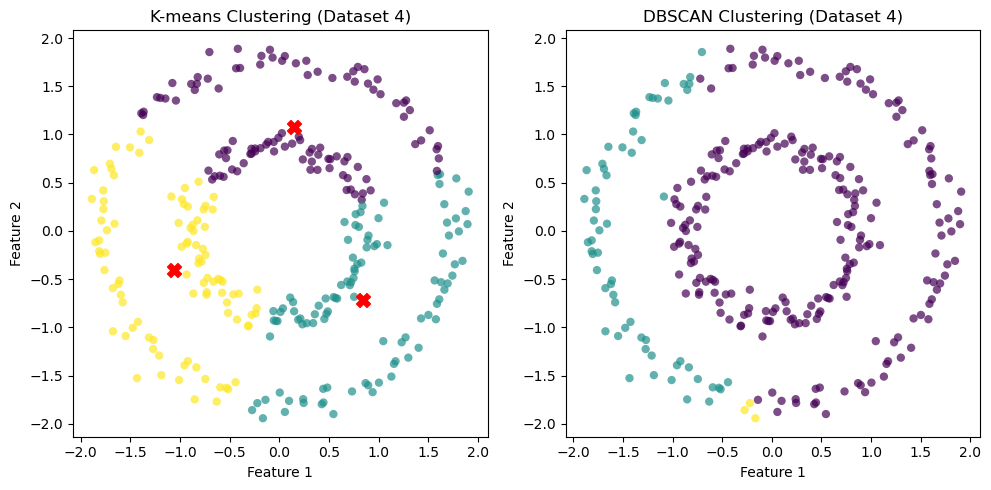

In [111]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data points and final centroids for K-means clustering
axs[0].scatter(X_scaled3[:, 0], X_scaled3[:, 1], c=cluster_assignments3, alpha=0.7, edgecolors='none')
axs[0].scatter(centroids3[:, 0], centroids3[:, 1], marker='X', color='red', s=100)
axs[0].set_title('K-means Clustering (Dataset 4)')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Plot the data points for DBSCAN clustering
axs[1].scatter(X_scaled3[:, 0], X_scaled3[:, 1], c=labels3, alpha=0.7, edgecolors='none')
axs[1].set_title('DBSCAN Clustering (Dataset 4)')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

### statistics

In [112]:
table = [['K-mean',f1_k1,nmi_k1,rand_statistic_k1], 
         ['DBSACN',f1_D1,nmi_D1,rand_statistic_D1]]
df_rank = pd.DataFrame(table, columns=['Models','F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,1.0,1.000000,1.0000
DBSACN,0.0,0.954009,0.9868


In [113]:
table = [['K-mean',f1_k2,nmi_k2,rand_statistic_k2], 
         ['DBSACN',f1_D2,nmi_D2,rand_statistic_D2]]
df_rank = pd.DataFrame(table, columns=['Models','F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.555556,0.73368,0.777035
DBSACN,0.000000,0.73368,0.777035


In [114]:
table = [['K-mean',f1_k3,nmi_k3,rand_statistic_k3], 
         ['DBSACN',f1_D3,nmi_D3,rand_statistic_D3]]
df_rank = pd.DataFrame(table, columns=['Models','F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.843332,0.373759,0.734872
DBSACN,0.404313,0.358284,0.635741


In [115]:
table = [['K-mean',f1_k4,nmi_k4,rand_statistic_k4], 
         ['DBSACN',f1_D4,nmi_D4,rand_statistic_D4]]
df_rank = pd.DataFrame(table, columns=['Models','F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.396041,0.000255,0.498484
DBSACN,0.387013,0.257281,0.582809
